# Project One

## Introduction
This research project explores variations and factors affecting tech salaries, leveraging a dataset from results of a 2016 Hacker News survey about salaries and bonuses. The data is obtained from [Kaggle Notebook](https://www.kaggle.com/datasets/thedevastator/know-your-worth-tech-salaries-in-2016), original source by Brandon Telle [[source]](https://data.world/brandon-telle/2016-hacker-news-salary-survey-results). This dataset includes details about salaries in the tech industry in 2016, including information such as employer, location, job title, experience level, and compensation details. 

The primary focus of this reserach is on analyzing effect experience has on tech salary. The research question guiding this investigation is: "To what extent does experience influence salaries in the tech industry?" Through data analysis and visualization, this research aims to uncover patterns and correlations between salary and experience that can contribute to a more nuanced understanding of compensation trends within the tech sector.

Previous research shows that for the average individual, most forms of experiences the field, such as time spent at a different job, generally offer similar returns in wages. However, skills obtained in a different industry or occupation may be less valuable compared to other types of experience. For example a study by Goldsmith and Veum (2002) shows that while diverse experiences within the same industry or occupation are valuable, skills acquired from experiences in entirely different contexts might not provide as much benefit. Additionally, a research donducted by Williams (1991) indicates that as employees accumulate more time (tenure) at a specific job, their wages tend to increase, especially during the initial years of employment. However, this effect diminishes over time, implying that while job tenure initially contributes significantly to wage growth, its impact becomes less pronounced as employees remain in the same job for longer periods. On the other hand, general labor market experience has a smaller immediate impact on wages, yet its cumulative effect over a career is greater than job-specific tenure. 

Furthmore, according to Lazear (1976), Young employees typically receive around one-third of their overall employment compensation through human capital. As a result, the influence of present toal work experience on determining salary is substantial. Bagger and et al (2014) provides further research on this, stating that human capital accumulation (improvement of skills and knowledge) and job search activities, influence the shape of salary-experience models. Specifically, within the first ten years of a career, the effect of job search on salary growth, whether within or between jobs, decreases. These studies provide valuable insights into the nuanced dynamics of the labour market, laying the groundwork for this paper's research into the affects of experience in the tech industry specifically.

Dependent variable (Y): Annual base pay is set to be the dependent variable. 

- *annual_base_pay*: The annual base pay is the fixed yearly salary, excluding any additional bonuses or benefits. It serves as the dependent variable in my analysis because it representes the core earnings of the respondent and is a key metric in understanding the global tech salary landscape. This allows me to how analyze how experience influences salary trends.

Independent variables (X): The following variables are set to be the independent variables: country, totla experience years, experience years with current employer, job category, These chosen independent variables collectively provide a comprehensive view of factors influencing annual base pay in the tech industry, directly addressing the research question on the variations in salaries and the underlying factors contributing to these variations.

- *location_country*: The location_country variable represents the country in which the respondent is employed. This variable is essential for understanding salary disparities across different regions and countries. Economic conditions, cost of living, and market demand for tech professionals vary greatly between countries, which directly influences salary levels. Including location_country as an independent variable allows for the analysis of how geographical location impacts annual base pay within the tech industry, directly addressing the research question on variations in tech salaries between different countries.
- *job_title_category*: The nature of the job, whether it's a software, data, engineering, or management can influence the salary level. Categorizing job roles helps examine how distinct fields in the tech industry contribute to salary variations. This variable is crucial for analysis as I seek to understand the impact of job categories on annual base pay.
- *total_experience_years*: The total number of years of professional experience the respondent has accumulated is an expected influencing factor on salary because individuals with more experience tend to command higher pay due to their acquired skills, expertise, and experience in the industry. Examining the experience level can reflect the market value of an individual's expertise in different locations, providing a more comprehensive understanding of the dynamics influencing compensation in the tech industry.
- *employer_experience_years*: Employer_experience_years represents the number of years the individual has worked for current employer. With more experience working for an employer, employees may become eligible for annual pay raises or advancement opportunities. Long-term employees may be valued for their corporate knowledge and loyalty, resulting in higher compensation to retain their expertise and commitment. Analyzing the how experience with employer correlates with annual base pay can provide insights into career progressions and the value of seniority within the industry. 

Inital analyses of salary trends by total and employer experience reveal notable disparities across job categories. While one might anticipate consistent salary growth over time, the data illustrates varied patterns. In terms of total experience, web and engineering roles demonstrate substantial growth, whereas operations and data jobs stagnate in base pay. Management and the "other" category experience significant salary increases after eight years, emphasizing the importance of accumulated experience in these categories. For software roles, despite high starting salaries, exhibit less dependence on experience due to rapid skill evolution. Similarly, regarding years with the current employer, management and the "other" category see notable salary growth with tenure, reflecting the significance of longetivity and experience in determining pay for these two categories. In contrast, technical roles show minimal growth, highlighting the significance of industry-specific skills over tenure. These initial insights underscore the nuanced dynamics of salary evolution, crucial for informed career decisions and compensation strategies.

## Data Cleaning/Loading

In [151]:
import warnings
import pandas as pd
import geopandas as gpd

#load in dataset
df = pd.read_csv("~/ECO225/ECO225Project/Data/salaries_cleaning.csv", low_memory=False)
df.head()

,index,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,0,1,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,NaN,13.0,2.0,125000.0,5000.0,0.0,5000 shares,Don't work here.,3/21/16 12:58
1,1,3,walmart,"bentonville, ar",AR,US,36.36,-94.20,senior developer,Software,Senior,15.0,8.0,65000.0,NaN,5000.0,"3,000",NaN,3/21/16 12:58
2,2,4,vertical knowledge,"cleveland, oh",OH,US,41.47,-81.67,software engineer,Software,NaN,4.0,1.0,86000.0,5000.0,6000.0,0,NaN,3/21/16 12:59
3,3,6,netapp,waltham,MA,US,NaN,NaN,mts,Other,NaN,4.0,0.0,105000.0,5000.0,8500.0,0,NaN,3/21/16 13:00
4,4,12,apple,cupertino,CA,US,NaN,NaN,software engineer,Software,NaN,4.0,3.0,110000.0,5000.0,7000.0,150000,NaN,3/21/16 13:02


In [152]:
#drop unneeded columns
cleaned_df = df.drop(columns=["index", "salary_id", "job_title_rank", "employer_name", 
                              "signing_bonus", "stock_value_bonus", "comments", "submitted_at"])

#display percentage of missing data (null value) in each column: number of NaNs/total number of index
round(100*(cleaned_df.isnull().sum()/len(cleaned_df.index)), 2)

location_name                 0.00
location_state               30.31
location_country              4.36
location_latitude            49.79
location_longitude           49.79
job_title                     0.00
job_title_category            0.00
total_experience_years        2.84
employer_experience_years     2.84
annual_base_pay               0.24
annual_bonus                 19.30
dtype: float64

In [153]:
#drop rows that have missing values for annual base pay, employer, employer_experience_years, total_experience_years and location_country
cleaned_df.dropna(subset=['annual_base_pay', 'total_experience_years', 'employer_experience_years', 'location_country'], inplace=True)

#drop duplicate entries
cleaned_df = cleaned_df.drop_duplicates(subset=['location_name', 'location_state', 'location_country', 
                                                'location_latitude', 'location_longitude', 'job_title', 'job_title_category', 
                                                'total_experience_years', 'employer_experience_years', 'annual_base_pay', 'annual_bonus'])

#reset index
cleaned_df.reset_index(drop=True, inplace=True)

#replace missing values in annual_bonus with 0
cleaned_df['annual_bonus'] = cleaned_df['annual_bonus'].fillna(value=0)

In [154]:
import geopy.geocoders
from geopy.geocoders import GoogleV3
import certifi
import ssl

import pycountry

from Config import api_key

#get latitude and longitude from city and country
cleaned_df['location_name'] = cleaned_df['location_name'].str.split(',').str[0]
ctx = ssl.create_default_context(cafile=certifi.where())
geopy.geocoders.options.default_ssl_context = ctx

def get_lat_long(row):
    city = row['location_name']
    country = row['location_country']
    geolocator = GoogleV3(api_key = api_key)
    location = geolocator.geocode(f"{city}, {country}")
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

In [176]:
cleaned_df[['location_latitude', 'location_longitude']] = cleaned_df.apply(get_lat_long, axis=1, result_type='expand')
cleaned_df.to_csv("salaries_cleaned.csv")

In [177]:
#load in exchange_rates dataset
exchange_rates_df = pd.read_csv("/Users/macychen/ECO225/ECO225Project/Data/exchange_rates_2016.csv", low_memory=False)
cleanedrates_df = exchange_rates_df.drop(columns=['INDICATOR', "SUBJECT", "MEASURE", "FREQUENCY", "TIME", "Flag Codes"])
cleanedrates_df['Value'] = cleanedrates_df['Value'].astype(float)

cleanedrates_df.head()

,LOCATION,Value
0,AUS,1.345214
1,AUT,0.903421
2,BEL,0.903421
3,CAN,1.325615
4,CZE,24.439917


In [283]:
# Create a dictionary to map country to exchange rate
exchange_rate_dict = dict(zip(cleanedrates_df['LOCATION'], cleanedrates_df['Value']))

base_df = pd.read_csv("~/ECO225/ECO225Project/Data/salaries_cleaned.csv", low_memory=False)
base_df['location_country'] = [pycountry.countries.get(alpha_2=code).alpha_3 for code in base_df['location_country']]

# Multiply salary and bonus by the exchange rate using map
base_df['annual_bonus'] = (1/base_df['location_country'].map(exchange_rate_dict)) * base_df['annual_bonus']
base_df['annual_base_pay'] = (1/base_df['location_country'].map(exchange_rate_dict)) * base_df['annual_base_pay']

base_df = base_df[base_df['annual_base_pay'] != 0]
base_df['annual_bonus'] = base_df['annual_bonus'].fillna(value=0)

base_df.head()

,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,annual_bonus
0,san francisco,CA,USA,37.774929,-122.419415,systems engineer,Engineering,13.0,2.0,125000.0,0.0
1,bentonville,AR,USA,36.372356,-94.210214,senior developer,Software,15.0,8.0,65000.0,5000.0
2,cleveland,OH,USA,41.499320,-81.694361,software engineer,Software,4.0,1.0,86000.0,6000.0
3,waltham,MA,USA,42.376485,-71.235611,mts,Other,4.0,0.0,105000.0,8500.0
4,cupertino,CA,USA,37.322998,-122.032182,software engineer,Software,4.0,3.0,110000.0,7000.0


## Summary Statistics Tables

In [284]:
summary_columns = base_df.drop(['location_latitude', 'location_longitude'], axis=1).columns
base_df[summary_columns].describe()

,total_experience_years,employer_experience_years,annual_base_pay,annual_bonus
count,1512.000000,1512.000000,1.512000e+03,1512.000000
mean,6.568671,2.521733,1.094018e+05,7109.686242
std,5.294033,2.695830,3.600806e+05,27601.150643
min,0.000000,0.000000,3.015246e-02,0.000000
25%,3.000000,1.000000,5.800000e+04,0.000000
50%,5.000000,2.000000,9.418736e+04,0.000000
75%,10.000000,3.000000,1.260000e+05,7000.000000
max,40.000000,30.000000,1.028000e+07,750000.000000


The summary statistics table provides valuable insights into quantitative variables associated with salaries and experience. The average total experience (mean) is approximately 6.6 years, with the standard deviation at 5.3 years. The minimum of 0 years suggests the presence of respondents with minimal experience in the industry, while the maximum is at 40 years. The average years with current employer is approximately 2.5 years, with the standard deviation at 2.7 years. Similar to total experience years, the minimum of 0 years and maximum of 30 years reflects a large difference in years with current employer. This notable range between maximum and minimum experience years indicates a diverse set of experience levels within the respondents of the survey. 

The average annual base pay is \$109401.80 USD, but the high standard deviation of \$360080.60 USD indicates substantial salary variability. Notably, some entries report no base pay, and there is a wide range of salaries, including potential outliers with extremely high values. Whether this is related to the wide range of experience years can be explored later in my research. 

The annual bonus, with a mean of \$7109.69 USD and a significant standard deviation of \$27601.15 USD, reveals wide-ranging bonus amounts, and a substantial proportion of individuals do not receive a bonus, as indicated by the 25th and 50th percentiles that are \$0 USD. Similar to annual base pay, the difference between the maximum and minimum annual bonus recorded is also very large, which could indicate potential outliers as well. 

For the research question on relationship between salary and experience, attention will be given to outliers in annual base pay and bonus, and further exploration is warranted to understand the distribution. I plan to explore factors contributing to this variation, such as experience level, location and job category. While additional data exploration and statistical analysis are needed to draw more robust conclusions about the factors influencing salary variation, this summary statistics table provide a foundation for more in-depth analysis and indications to areas of interest. 

In [285]:
base_df.describe(include=['object'])

,location_name,location_state,location_country,job_title,job_title_category
count,1512,1101,1512,1512,1512
unique,442,50,61,614,8
top,san francisco,CA,USA,software engineer,Software
freq,165,408,1067,287,823


This summary statistics table presents a snapshot of the qualitative variables related to tech industry jobs across different employers and locations. With a total of 1,512 entries after cleaning, the dataset encompasses a diverse range of 61 unique countries. The United States (US) dominates with 1,067 occurrences. This represents that the majority of respondents work in the US, with San Francisco, California being the common. This finding aligns with the United States being known a global leader in the technology industry, with the well-known concentration of tech companies and innovation hubs in the broader California region. 

In terms of job titles, "Software Engineer" stands out as the most frequently occurring title at 287 times. In line with this result, out of the eight job categories available (engineering, software, web, data, management, operations, applied science, other), "Software" is most commonly worked in, appearing 823 times. This high popularity in software-related jobs likely results in higher competition in this category, and its effect on the experience-salary relationship is an area of exploration for my research. 

## Plots, Histograms, Figures

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

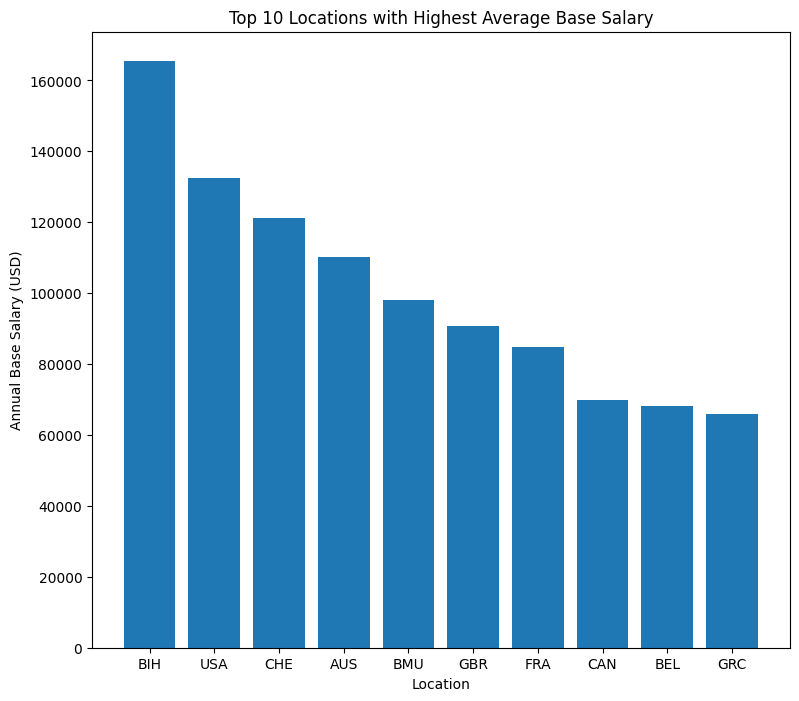

In [286]:
# Group by country and calculate the mean salary
countrygrouped_df = base_df.groupby('location_country')['annual_base_pay'].mean().reset_index()

# Sort by mean salary in descending order and select the top 10
top_countries = countrygrouped_df.sort_values(by='annual_base_pay', ascending=False).head(10)

# Plotting
plt.figure(figsize=(9, 8))

plt.bar(top_countries['location_country'], top_countries['annual_base_pay'])
plt.title('Top 10 Locations with Highest Average Base Salary')
plt.xlabel('Location')
plt.ylabel('Annual Base Salary (USD)')

plt.show()

Looking at the top 10 locations with the highest average base salary, it can be seen that Bosnia and Herzegovina (BIH) offers the highest average base salary. However, this dataset only contains 1 entry for this country, therefore the results may not be an accurate reflection of the true average salary of the country. Employers in the United States (USA) offer the second highest base salary on average, with location such as Switzerland (CHE), Australia (AUS), Bermuda (BMU), Great Britain (GBR), France (FRA), and Canada (CAN) following behind. This variable is crucial as it provides a quantitative measure of the average base salary, allowing for a comparative analysis of compensation levels among different nations. 

The fact that the United States is not only the most popular work in in the dataset (as indicated by the summary statistics table), but also has high average base salary suggests a correlation between the country's prevalence in the tech industry and the compensation levels offered. It prompts further questions about the specific factors contributing to the United States' leading position in both aspects. I will be exploring these factors in the following figures to provide deeper insights into the dynamics of the tech industry in different countries and the corresponding salary structures. 

The plot is directly related to the research question because it provides a visual representation of how average base salaries differ across locations. Understanding these variations is crucial for uncovering how experience levels contribute to salary differences in the tech industry on a global scale. The identification of specific countries in the top ranks highlights potential areas for further investigation. This plot provides a foundation for more in-depth analysis and interpretation, contributing to a comprehensive understanding of how experience influences salary in tech industry globally.

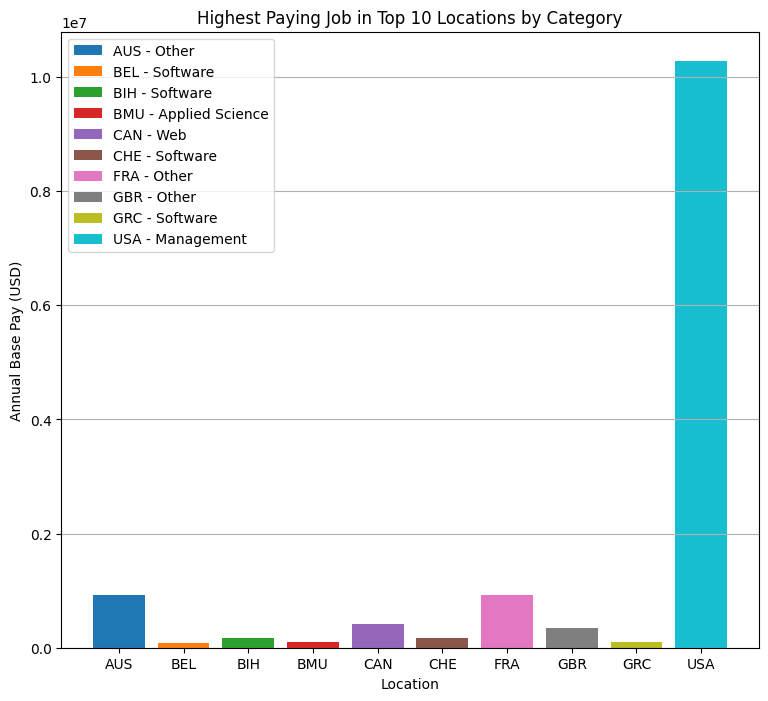

In [287]:
# Select top 
selected_countries = top_countries['location_country']
selected_countries_df = base_df[base_df['location_country'].isin(selected_countries)]

# Find the highest paying job category for each selected country
max_salary_idx = selected_countries_df.groupby(['location_country'])['annual_base_pay'].idxmax()
highest_paying_df = selected_countries_df.loc[max_salary_idx]

plt.figure(figsize=(9, 8))

for country, group in highest_paying_df.groupby('location_country'):
    plt.bar(country, group['annual_base_pay'].values[0], label=f'{country} - {group["job_title_category"].values[0]}')

# Customize the plot
plt.title('Highest Paying Job in Top 10 Locations by Category')
plt.xlabel('Location')
plt.ylabel('Annual Base Pay (USD)')
plt.legend()
plt.grid(axis='y')

plt.show()

The choice of creating a follow-up plot showcasing the category of the highest paying job in each of the top 10 locations with the highest average base salary adds a layer of complexity and nuance to the analysis. This variable is selected because it provides insights into the specific job categories that contribute significantly to high salaries in each location. Understanding the distribution of high-paying job categories allows for a more detailed examination of salary variations within the tech industry across different locations. 

From the graph, "software" and "other" are demonstrated to be the most common highest paying job category. The prevalence of "Software Engineer" as the most frequently occurring job title in the first summary statistics table and "software" being the highest paying job category in several countries underscore the global importance and high demand for software-related roles in the tech industry. Companies and countries recognizing the critical role of software in their technological landscape are likely to allocate higher compensation to professionals who possess expertise in this domain, resulting in the popularity of this category. Despite a substantial pool of available talent (high apply), the tech industry's continuous pursuit of innovation and the development of digital products contribute to the sustained demand for skilled software professionals. Interestingly, many countries' top paying job doesn't belong in any of 8 main categories. This could be contributed to the growing start-up, self-employment and freelancing community.

The highest paying job recorded the dataset is in the US, falling under the management category. It is worth noting that its annual base pay far surpasses any other jobs offered in other countries. This aligns with the discovery from the previous graph that employers in the US offers the high average base salary. The high annual base pay offered is undoubtedly an incentive for workers to seek employment in the US, resulting in the country being the most popular as seen in the second summary statistics table. Management as the highest paying job category implies a significant emphasis on leadership positions. This behaviour not seen in any other countries from this dataset, which could indicate that such positions in the US pay significantly higher compared to other countries and is a significant factor in raising the overall higher average base salary in the country. 

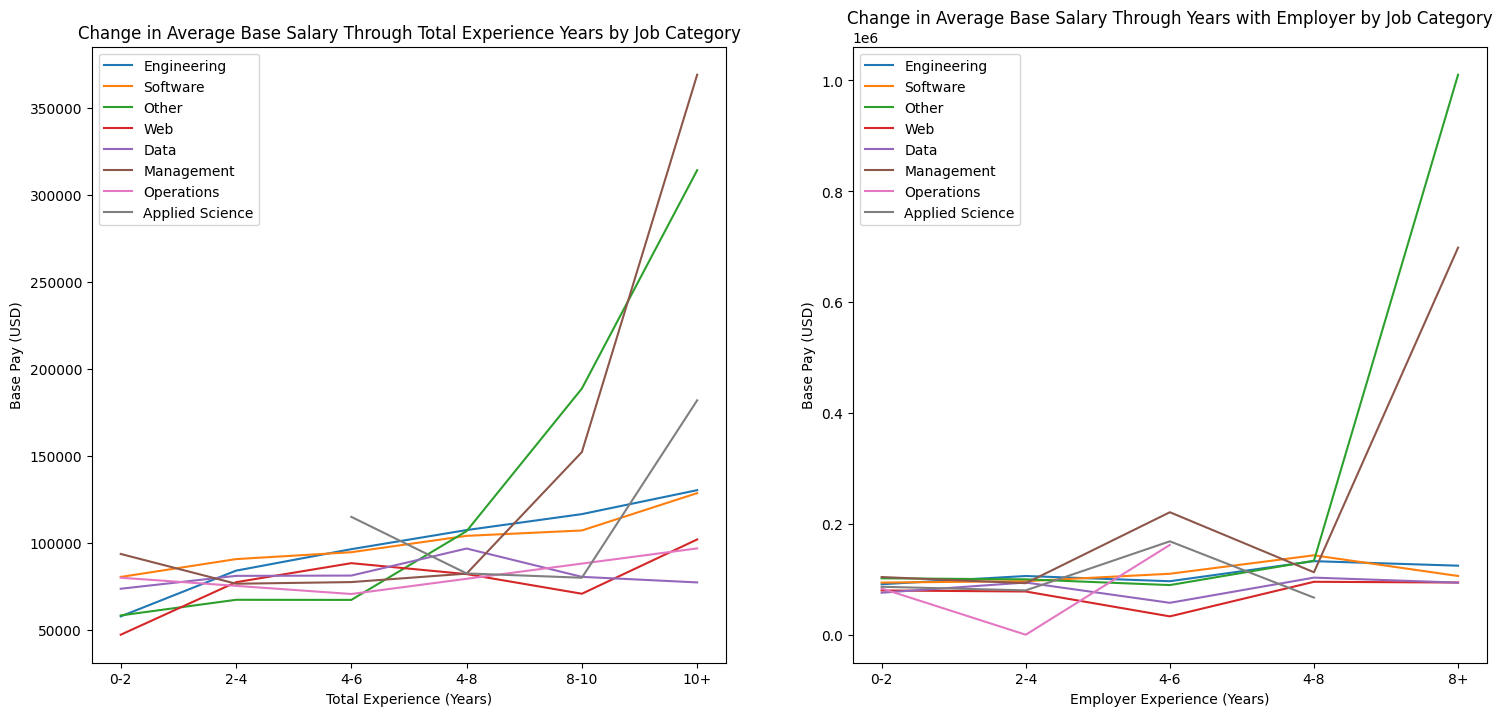

In [288]:
texp_grouped_df = base_df.copy()
texp_grouped_df['experience_group'] = pd.cut(base_df['total_experience_years'], bins=[0, 2, 4, 6, 8, 10, float('inf')], labels=['0-2', '2-4', '4-6', '4-8', '8-10', '10+'])
avg_pay_grouped_t = texp_grouped_df.groupby(['job_title_category', 'experience_group'], observed=True)['annual_base_pay'].mean().reset_index()

eexp_grouped_df = base_df.copy()
eexp_grouped_df['experience_group'] = pd.cut(base_df['employer_experience_years'], bins=[0, 2, 4, 6, 8, float('inf')], labels=['0-2', '2-4', '4-6', '4-8', '8+'])
avg_pay_grouped_e = eexp_grouped_df.groupby(['job_title_category', 'experience_group'], observed=True)['annual_base_pay'].mean().reset_index()

# Plotting two maps side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Map 1
for job_category in base_df['job_title_category'].unique():
    job_data = avg_pay_grouped_t[avg_pay_grouped_t['job_title_category'] == job_category]
    axes[0].plot(job_data['experience_group'], job_data['annual_base_pay'], label=job_category)

axes[0].set_xlabel('Total Experience (Years)')
axes[0].set_ylabel('Base Pay (USD)')
axes[0].set_title('Change in Average Base Salary Through Total Experience Years by Job Category')
axes[0].legend()

# Map 2
for job_category in base_df['job_title_category'].unique():
    job_data = avg_pay_grouped_e[avg_pay_grouped_e['job_title_category'] == job_category]
    axes[1].plot(job_data['experience_group'], job_data['annual_base_pay'], label=job_category)

axes[1].set_xlabel('Employer Experience (Years)')
axes[1].set_ylabel('Base Pay (USD)')
axes[1].set_title('Change in Average Base Salary Through Years with Employer by Job Category')
axes[1].legend()


plt.show()

Looking at the salaries trend by total and employer experience, I would expect every category to trend upward as time goes on for both graphs. However, the graphs show that some fields have significantly larger increases than others. 

For salaries trend by total experience, web and engineering jobs experience overall growth, while operations and data jobs appear to stagnate in base pay, remaining in the high five figures throughout the years. Management has the highest entry-level salary (0 total experience years) and experiences a significant increase after 8 years of total experience, ending up as the highest paying category when the total experience years is high. While the "other" category starts with lower salaries early in the career, it experiences a similar boost to the management category after 8 years. This supports the results from the previous highest-paying job graph. Freelancers or self-employed individuals are often unable to earn high salaries at the beginning due to immense investment, but once successful, they see great returns. Interestingly, despite software being the most popular and highest-paying category in many countries, while base salary does increase steadily throughout the years, it is not significant compared to other fields. Despite it having the second highest entry-level salary, just after management, its salary doesn't depend heavily on total experience. A reason behind this could be that the software field evolves rapidly, and in some cases, employees may reach a point where their skill set and experience have plateaued, and they are not acquiring new, in-demand skills. Due to this, this category values new talents, and they are attracted by its high starting salary, resulting in the high supply and demand in this category. 

For salaries trend by years with current employer, while the starting base salary appears to be quite similar for all categories, only the management and "other" category sees significant growth as years with current employer increases. All other categories appear to be relatively stagnant, experiencing minimal growth. A clear divide emerges between roles dependent on company experience versus those reliant on technical proficiency. Management and the "other" category exhibit substantial salary growth as tenure increases, reflecting the significance of trust, loyalty, and accumulated experience within an organization. In contrast, technical roles experience minimal growth, as pay is primarily determined by industry-specific skills rather than employer-specific tenure. This suggests that while technical expertise is an important determinant for base pay in certain categories in the tech industry, base pay for less technical roles often correlates with organizational longevity and leadership capabilities.

In conclusion, analyzing salary trends by total and employer experience reveals interesting insights into the dynamics of various job categories. While one might expect a uniform upward trajectory in salaries over time, the data showcases distinct patterns across different fields. The graphs offer insights into how experience influences salary and which job categories exhibit more prominent pay growth with increased experience, both in total and with current employer. These trends underscore the multifaceted nature of salary dynamics within different job categories, influenced by factors such as industry demand, skill evolution, and corporate culture. Understanding these nuances is crucial for both employers and employees in navigating career trajectories and compensation strategies effectively.

# Project Two

## The Message

While overall salary growth is expected over time, certain job categories in tech industry exhibit more significant increases than others. Experience plays a crucial role in with management and certain non-traditional roles showing substantial salary growth with increased tenure, while technical roles see minimal growth, indicating that tech salary dynamics are influenced by not only experience, but also technical proficiency depending on the job category.

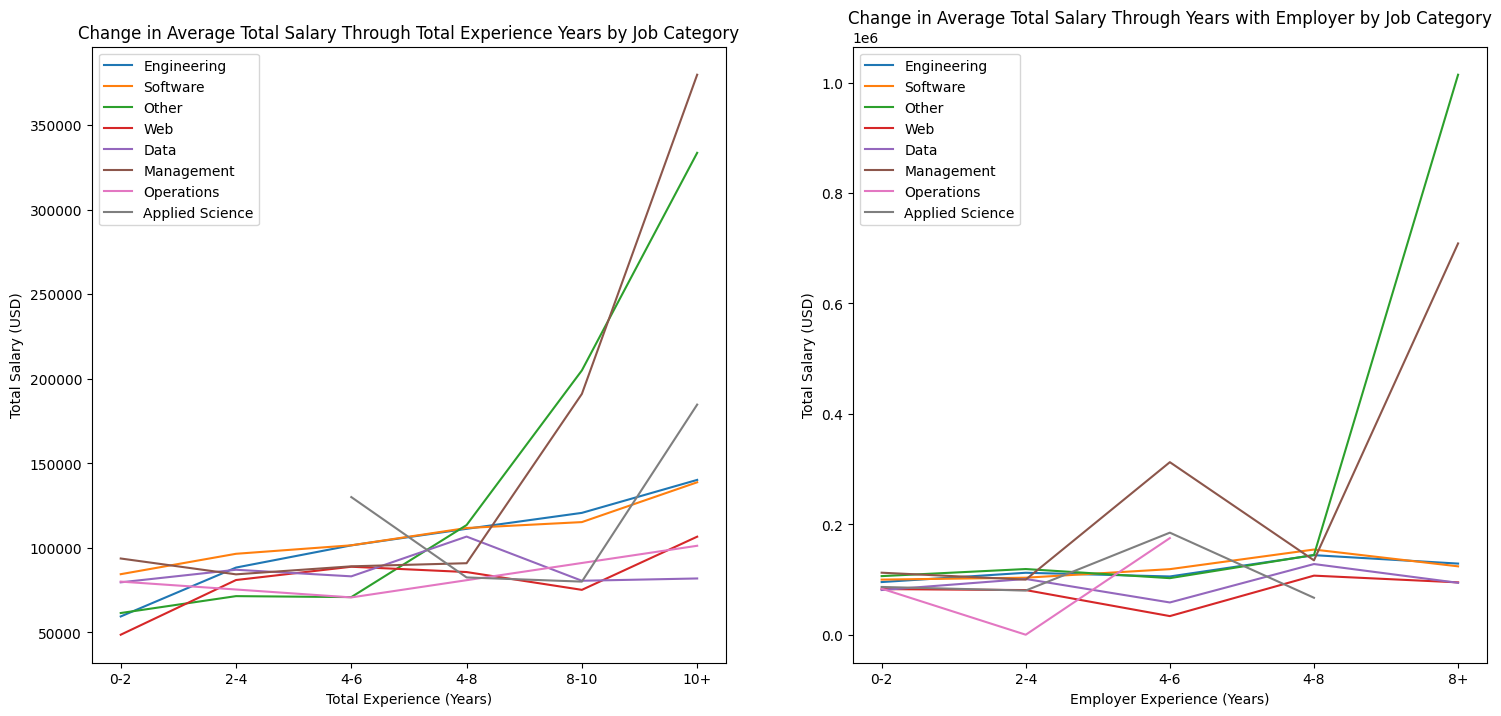

In [291]:
# Add the values of annual base pay and annual bonus together
base_df['total_salary'] = base_df['annual_base_pay'] + base_df['annual_bonus']

texp_grouped2_df = base_df.copy()
texp_grouped2_df['experience_group'] = pd.cut(base_df['total_experience_years'], bins=[0, 2, 4, 6, 8, 10, float('inf')], labels=['0-2', '2-4', '4-6', '4-8', '8-10', '10+'])
avg_pay_grouped_t2 = texp_grouped2_df.groupby(['job_title_category', 'experience_group'], observed=True)['total_salary'].mean().reset_index()

eexp_grouped2_df = base_df.copy()
eexp_grouped2_df['experience_group'] = pd.cut(base_df['employer_experience_years'], bins=[0, 2, 4, 6, 8, float('inf')], labels=['0-2', '2-4', '4-6', '4-8', '8+'])
avg_pay_grouped_e2 = eexp_grouped2_df.groupby(['job_title_category', 'experience_group'], observed=True)['total_salary'].mean().reset_index()

# Plotting two maps side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Map 1
for job_category in base_df['job_title_category'].unique():
    job_data = avg_pay_grouped_t2[avg_pay_grouped_t2['job_title_category'] == job_category]
    axes[0].plot(job_data['experience_group'], job_data['total_salary'], label=job_category)

axes[0].set_xlabel('Total Experience (Years)')
axes[0].set_ylabel('Total Salary (USD)')
axes[0].set_title('Change in Average Total Salary Through Total Experience Years by Job Category')
axes[0].legend()

# Map 2
for job_category in base_df['job_title_category'].unique():
    job_data = avg_pay_grouped_e2[avg_pay_grouped_e2['job_title_category'] == job_category]
    axes[1].plot(job_data['experience_group'], job_data['total_salary'], label=job_category)

axes[1].set_xlabel('Employer Experience (Years)')
axes[1].set_ylabel('Total Salary (USD)')
axes[1].set_title('Change in Average Total Salary Through Years with Employer by Job Category')
axes[1].legend()


plt.show()

## Maps and Interpretations

### Merging with a New Dataset

The data is obtained from [Numbeo](https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2016&displayColumn=-1). This dataset includes details about the cost of living in countries in 2016, including information such as the cost of living index, rent index, cost of living and rent index, groceries index, restaurant index, and local purchasing power index. Incorporating a dataset on the cost of living index for various countries can help assess whether salary adjustments for experience are sufficient to maintain consistent standards of living. This analysis can reveal whether tech professionals with similar levels of experience enjoy comparable purchasing power regardless of their geographic location.

In [200]:
# Load in dataset
COLIndex_df = pd.read_csv("~/ECO225/ECO225Project/Data/COL_index_2016.csv", low_memory=False)
COLIndex_df.drop(columns=['rent_index', "cost_of_living_plus_rent_index", "groceries_index", 'restaurant_index', 
                              "local_purchasing_power_index"], inplace=True)
COLIndex_df.head()

,location_country,cost_of_living_index
0,Bermuda,133.7
1,Switzerland,123.1
2,Bahamas,107.5
3,Norway,99.8
4,Iceland,96.5


In [201]:
# Function to map country names to ISO Alpha-3 codes
def get_country_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

COLIndex_df['location_country'] = COLIndex_df['location_country'].apply(get_country_code)

In [292]:
# Merge cost of living index data with original data
merged_df = base_df.merge(COLIndex_df, how='left', on='location_country')
merged_df.head()

,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,annual_bonus,total_salary,cost_of_living_index
0,san francisco,CA,USA,37.774929,-122.419415,systems engineer,Engineering,13.0,2.0,125000.0,0.0,125000.0,74.1
1,bentonville,AR,USA,36.372356,-94.210214,senior developer,Software,15.0,8.0,65000.0,5000.0,70000.0,74.1
2,cleveland,OH,USA,41.499320,-81.694361,software engineer,Software,4.0,1.0,86000.0,6000.0,92000.0,74.1
3,waltham,MA,USA,42.376485,-71.235611,mts,Other,4.0,0.0,105000.0,8500.0,113500.0,74.1
4,cupertino,CA,USA,37.322998,-122.032182,software engineer,Software,4.0,3.0,110000.0,7000.0,117000.0,74.1


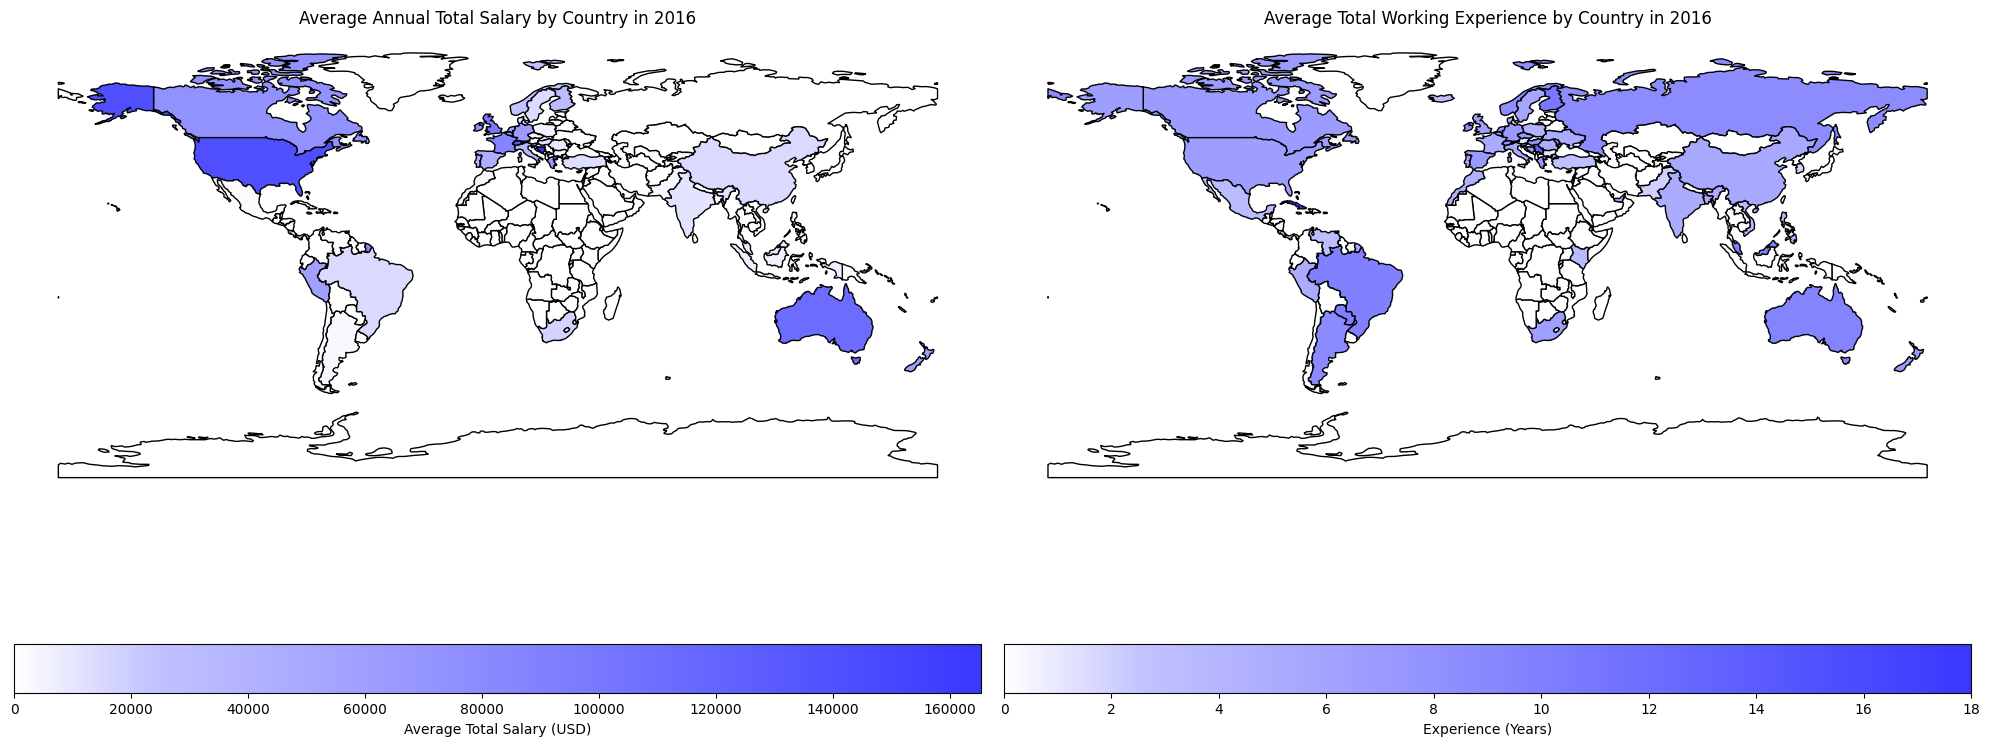

In [294]:
countrymean_df = base_df.groupby('location_country')[['total_salary', 'total_experience_years']].mean().reset_index()

# Read world file
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Merge mean salary data with world shapefile
countrymean_gdf = world.merge(countrymean_df, how='left', left_on='iso_a3', right_on='location_country')

# Set NaN values to 0
countrymean_gdf['total_salary'].fillna(0, inplace=True)
countrymean_gdf['total_experience_years'].fillna(0, inplace=True)

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define custom colormap
colors = ['#FFFFFF', '#C2C2FF', '#ABABFF', '#9494FF', '#7D7DFF', '#6666FF', '#4F4FFF', '#3838FF']
cmap = LinearSegmentedColormap.from_list('custom_palette', colors)

# Plotting two maps side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Map 1: average annual salary by country
average_salary_plot = countrymean_gdf.plot(column='total_salary', ax=ax[0], legend=True, edgecolor='black',
           legend_kwds={'label': "Average Total Salary (USD)", 'orientation': "horizontal"}, cmap=cmap)
ax[0].set_title('Average Annual Total Salary by Country in 2016')
ax[0].axis('off')

# Map 2: average total experience years by country
average_bonus_plot = countrymean_gdf.plot(column='total_experience_years', ax=ax[1], legend=True, edgecolor='black',
           legend_kwds={'label': "Experience (Years)", 'orientation': "horizontal"}, cmap=cmap)
ax[1].set_title('Average Total Working Experience by Country in 2016')
ax[1].axis('off')

plt.tight_layout()
plt.show()

The maps compare the average annual total salary with the average total working experience in countries across the world. Higher average annual salaries can be mainly seen in countries in North America and Europe as well as Australia, as indicated by the darker purple shades on the left map. The map on the right, which depicts mean working experience in years, shows a similar concentration of higher values in such regions. Through the two maps, there appears to be a correlation between annual salary and working experience, as areas with higher average annual salaries also tend to have higher average total working experience. This implies that there may be a positive relationship between salary and experience in the tech industry, suggesting that individuals with more experience tend to command higher salaries. 

This finding is supported by the "Change in Average Base Salary Through Experience Years by Job Category", which sees a upward trend in salary in the majority of job categories as experience years increase. The correlation could be attributed to several factors. Firstly, as individuals gain more experience in the tech industry, they often acquire specialized skills and knowledge for their job category that make them more valuable to employers, thereby justifying higher compensation. Moreover, companies may prioritize retaining experienced employees through competitive compensation, further reinforcing the correlation between salary and experience.

However, Russia stands out as a notable outlier, with an low average salary but high average working experience. One possible explanation is the challenges and fluctuations Russia's economy has faced, including currency devaluation, sanctions, and geopolitical tensions, which can impact salary levels and overall job market conditions. Additionally, the cost of living in Russia may be lower compared to other regions with higher average tech salaries, which could influence salary levels in the industry. This will be explored in the following map on the cost of living index by country. 

 Employers often adjust salaries based on local economic conditions and the availability of skilled workers, which determines the level of influence experience years can have on annual salary. In regions with a high cost of living and intense competition for talent, experience may carry more weight in determining salary levels. For example, in countries where the cost of living is high, tech professionals with more years of experience or specialized skills may command significantly higher salaries compared to those in less competitive markets. Additionally, the availability of annual bonuses can also vary depending on the region and the competitiveness of the job market. In high-cost areas, employers may offer more generous bonuses as part of their compensation strategy to attract and retain top talent. Overall, the cost of living index provides valuable insight into regional economic conditions, which shapes how much weight years of experience carry in determining the annual salary.

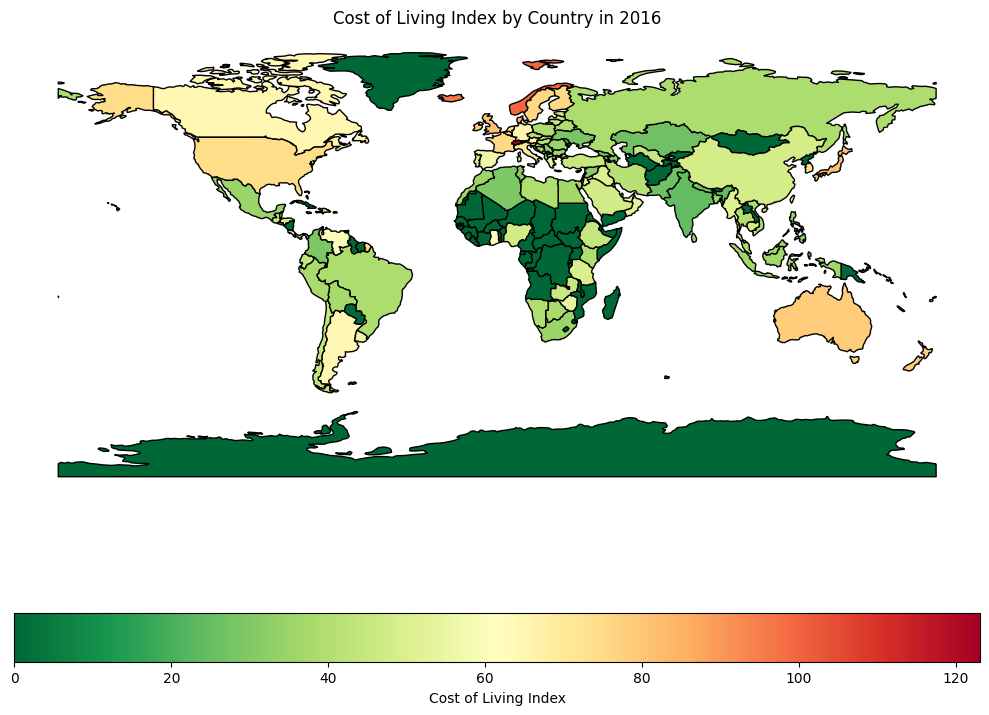

In [295]:
# Merge cost of living data with world shapefile
merged_gdf = world.merge(COLIndex_df, how='left', left_on='iso_a3', right_on='location_country')

merged_gdf['cost_of_living_index'].fillna(0, inplace=True)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

merged_gdf.plot(column='cost_of_living_index', ax=ax, legend=True, edgecolor='black', 
                legend_kwds={'label': "Cost of Living Index", 'orientation': "horizontal"}, cmap='RdYlGn_r')
ax.set_title('Cost of Living Index by Country in 2016')
ax.axis('off')

plt.tight_layout()
plt.show()

The maps illustrate the cost of living index by country across the world in 2016. Areas in dark green, where the cost of living index is 0, represent countries which the dataset does not contain data on. Upon examination, the highest cost of living is seen in countries/territories in Europe, notably Bermuda, Switzerland and Norway. Outside of Europe, countries such as the US, Australia, Argentina, Ghana and Japan are amongst the countries with the highest cost of living index in their respoective continents. 

The relationship between the cost of living and salary impacts the standard of living of individuals in that country. It is expected that tech salaries should be higher in countries with a higher cost of living index in order to compensenate for the increased expenses associated with living in those regions and to ensure that employees can maintain a comparable standard of living relative to their counterparts in areas with lower costs of living. This appears to be largely true when looking at countries/territories such as Bermuda, Switzerland, Australia, and the US, which all have a higher cost of living index but also high base salaries, as seen in the "Top 10 Locations with Highest Base Salary" graph. 

Looking at Russia, it can be seen that the cost of living is relatively low. This provides evidence for the previously mentioned idea that the cost of living may be a reason why the country is an outlier in terms of its tech salary and experience levels. With a low cost of living index, necessities such as groceries and utilities are generally more affordable relative to other global tech hubs. As a result, esalary offerings are lower due to the lower cost of living, even for highly skilled and experienced tech professionals. This results in low average base salaries compared to countries with higher living expenses.

 Employers often adjust salaries based on local economic conditions and the availability of skilled workers, which determines the level of influence experience years can have on annual base salary. In regions with a high cost of living and intense competition for talent, experience may carry more weight in determining salary levels. For example, in countries where the cost of living is high, tech professionals with more years of experience or specialized skills may command significantly higher salaries compared to those in less competitive markets. Additionally, the availability of annual bonuses can also vary depending on the region and the competitiveness of the job market. In high-cost areas, employers may offer more generous bonuses as part of their compensation strategy to attract and retain top talent. Overall, the cost of living index provides valuable insight into regional economic conditions, which shapes how much weight years of experience carry in determining the annual salary.

# Project Three

## Potential Data to Scrape

One potential data to scrape is the existence of national legislation on equal remuneration around the world. If possible, I hope to conduct HTML-based scraping on the [World Bank database](https://genderdata.worldbank.org/indicators/sg-law-eqrm-wk/?year=2016e) for equal remuneration laws by country. Analyzing the change in average total salaries in countries with and without equal remuneration laws across different experience years offers a multifaceted perspective on the dynamics of tech industry salaries in addressing the research question regarding the influence of experience on salaries. By comparing countries with and without equal remuneration laws, I hope to examine the changes in salary across various experience levels for a nuanced understanding of how different stages of career progression intersect with salary trends under different regulatory frameworks. Observing the existance of disparities in average salaries due equal remuneration laws and whether they diminish or persist as individuals gain more experience can provide insights into potential biases or inequities within the industry. 

## Potential Challenges

Scraping data from this source poses potential challenges due to the content of the table being loaded dynamically via JavaScript. The primary obstacle lies in that simply fetching the HTML source is not sufficient to capture all the data. To scrape the data accurately, I would need to ensure the content is captured after it has been fully loaded, which might require more advanced scraping techniques.
Employing browser automation with tools that simulates user interaction would likely be necessary to interact with the dynamic elements and extract the desired information accurately. To work on this in the future, I would need to familiarize myself with using Selenium in addition to BeautifulSoup and learn how to load and manipulate web pages effectively using this tool.

## Scraping Data from a Website

In [16]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

In [237]:
# Create a new instance of the Chrome driver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

url = "https://genderdata.worldbank.org/indicators/sg-law-eqrm-wk?year=2016"

# Load the page
driver.get(url)

# Get the page source after JavaScript execution
page_source = driver.page_source

# Close the browser
driver.quit()

# Parse the HTML content
soup_object = BeautifulSoup(page_source)

In [18]:
data_table = soup_object.find('table').find('tbody')
all_values = data_table.find_all('tr')

# Initialise index to zero
ix = 0
# Extract data from the table
pay_law_df = pd.DataFrame(columns = ['location_country', 'equal_remuneration_law'])
for row in all_values:
    # Extract all elements with tag <th>
    values = row.find_all('th')
    # Pick only the text part from the <th> tag
    country = values[0].text
    law = values[2].text

    # Store it in the dataframe as a row
    pay_law_df.loc[ix] = [country, law]
    ix += 1

pay_law_df.to_csv("pay_law.csv")
pay_law_df.head()

,location_country,equal_remuneration_law
0,Afghanistan,No
1,Albania,Yes
2,Algeria,Yes
3,American Samoa,N/A
4,Andorra,N/A


## Visualizing the Scraped Dataset

In [320]:
pay_law_df = pd.read_csv("~/ECO225/ECO225Project/Data/pay_law.csv", low_memory=False)
pay_law_df['location_country'] = pay_law_df['location_country'].apply(get_country_code)

# Merge reumuneration law data with original data
newmerged_df = merged_df.merge(pay_law_df, how='left', on='location_country')
newmerged_df.head()

,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,annual_bonus,total_salary,cost_of_living_index,equal_remuneration_law
0,san francisco,CA,USA,37.774929,-122.419415,systems engineer,Engineering,13.0,2.0,125000.0,0.0,125000.0,74.1,Yes
1,bentonville,AR,USA,36.372356,-94.210214,senior developer,Software,15.0,8.0,65000.0,5000.0,70000.0,74.1,Yes
2,cleveland,OH,USA,41.499320,-81.694361,software engineer,Software,4.0,1.0,86000.0,6000.0,92000.0,74.1,Yes
3,waltham,MA,USA,42.376485,-71.235611,mts,Other,4.0,0.0,105000.0,8500.0,113500.0,74.1,Yes
4,cupertino,CA,USA,37.322998,-122.032182,software engineer,Software,4.0,3.0,110000.0,7000.0,117000.0,74.1,Yes


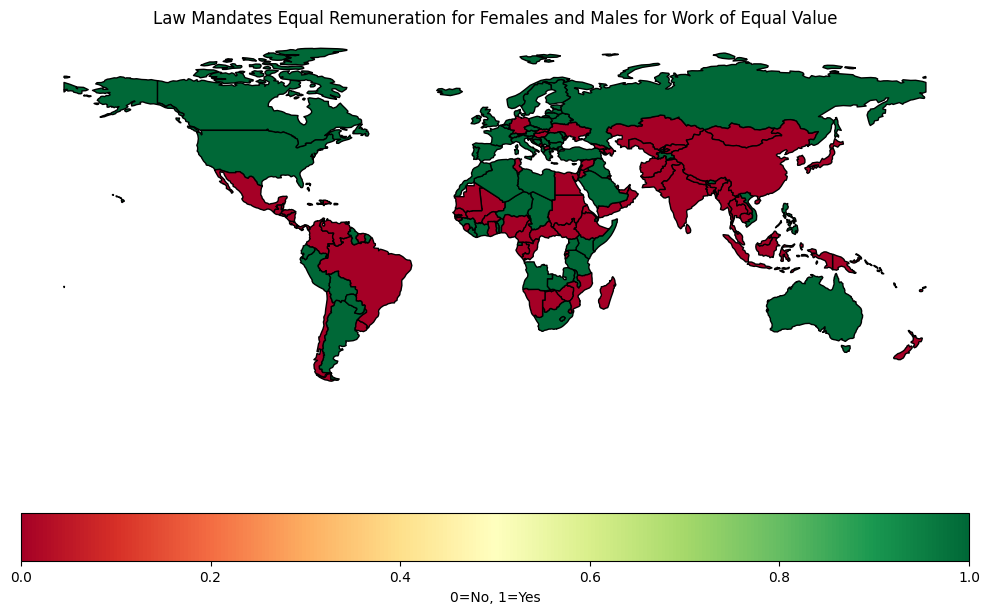

In [321]:
pay_law_df['equal_remuneration_law'].replace("No", 0, inplace=True)
pay_law_df['equal_remuneration_law'].replace("Yes", 1, inplace=True)

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read world file
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
pay_law_gdf = world.merge(pay_law_df, how='left', left_on='iso_a3', right_on='location_country')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

pay_law_gdf.plot(column='equal_remuneration_law', ax=ax, legend=True, edgecolor='black', 
                legend_kwds={'label': "0=No, 1=Yes", 'orientation': "horizontal"}, cmap='RdYlGn')
ax.set_title('Law Mandates Equal Remuneration for Females and Males for Work of Equal Value')
ax.axis('off')

plt.tight_layout()
plt.show()


The map shows the exsistance of national legislation on equal remuneration for males and females around the world. There appears to be a reltively even divide between countries with and without equal remuneration law. It is interesting to note all countries in the "Top 10 Locations with Highest Base Salary" have laws for equal remunerataion for females and males. The influence of equal remuneration laws on the salary-experience model will be explored in the following graph.

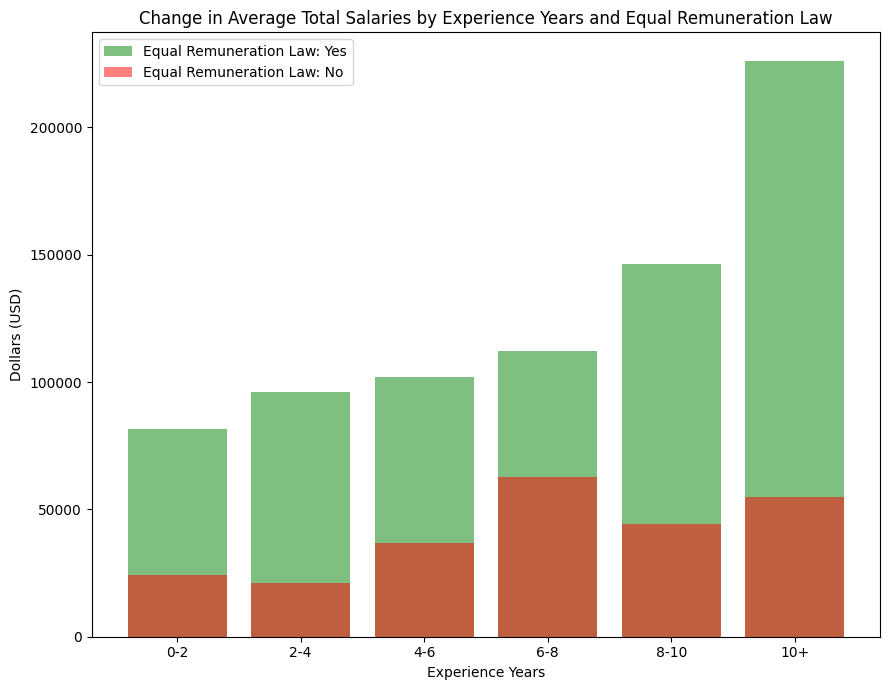

In [326]:
texp_law_df = newmerged_df.copy()

# Bin the experience years
texp_law_df['experience_group'] = pd.cut(texp_law_df['total_experience_years'], bins=[0, 2, 4, 6, 8, 10, float('inf')], labels=['0-2', '2-4', '4-6', '6-8', '8-10', '10+'])
texp_law_grouped_df = texp_law_df.groupby(['equal_remuneration_law', 'experience_group'], observed=True)['total_salary'].mean().reset_index()

# Plot
fig, ax = plt.subplots(figsize=(9, 7))

# Filter data for countries with equal_remuneration_law
law_yes_df = texp_law_grouped_df[texp_law_grouped_df['equal_remuneration_law'] == 'Yes']
law_no_df = texp_law_grouped_df[texp_law_grouped_df['equal_remuneration_law'] == 'No']

# Plot data for countries with equal_remuneration_law
ax.bar(law_yes_df['experience_group'], law_yes_df['total_salary'], color='green', label='Equal Remuneration Law: Yes', alpha=0.5)
# Plot data for countries without equal_remuneration_law, adjust position to avoid overlap
ax.bar(law_no_df['experience_group'], law_no_df['total_salary'], color='red', label='Equal Remuneration Law: No', alpha=0.5)

ax.set_title('Change in Average Total Salaries by Experience Years and Equal Remuneration Law')
ax.set_xlabel('Experience Years')
ax.set_ylabel('Dollars (USD)')
ax.legend()
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

The graph indicates an influence of equal remuneration laws on salaries within the tech industry, shedding light on the relationship between experience and compensation. Specifically, salaries for individuals in working in countries with legislation ensuring equal pay for males and females exhibit a distinct pattern of growth. It can be seen that salaries tend to follow an exponential trajectory as individuals accumulate more experience in the tech sector. This suggests that regulatory measures promoting pay equity positively impact salary advancement as experience years increase. 

Conversely, in countries lacking such legislation, the correlation between experience and salary growth is less apparent, indicating that without regulatory frameworks, salary progression may not align with increasing experience in the field. Moreover, the data reveals that salaries for individuals in countries with equal remuneration laws consistently surpass those in nations without such regulations. Furthermore, the salary disparity between these two groups of countries widens as individuals accumulate more years of experience in the tech industry. This underscores the significant role of equal remuneration laws in not only shaping salary growth trends but also in maintaining higher overall compensation levels. 

While experience undoubtedly influences salaries in the tech sector across all regions, the presence of equal remuneration laws amplifies this effect, ensuring fair and equitable compensation practices and resulting in more robust and sustained salary increases over time.

## Adding a New Dataset

In [309]:
labourforce_df = pd.read_csv("~/ECO225/ECO225Project/Data/labour_force_female.csv", low_memory=False)
columns_to_keep = ['Country Name', 'Country Code', '2016']
df_filtered = labourforce_df[columns_to_keep]
df_filtered.head()

,Country Name,Country Code,2016
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,47.049843
2,Afghanistan,AFG,21.307866
3,Africa Western and Central,AFW,44.904087
4,Angola,AGO,49.849024


In [310]:
# Merge female labour force data with original data
main_df = newmerged_df.merge(df_filtered, how='left', left_on='location_country', right_on='Country Code')
main_df.rename(columns={'2016': 'female_labour_force'}, inplace=True)
main_df.drop(columns=['Country Code', 'Country Name'], inplace=True)

main_df.head()

,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,annual_bonus,total_salary,cost_of_living_index,equal_remuneration_law,female_labour_force
0,san francisco,CA,USA,37.774929,-122.419415,systems engineer,Engineering,13.0,2.0,125000.0,0.0,125000.0,74.1,No,45.944943
1,bentonville,AR,USA,36.372356,-94.210214,senior developer,Software,15.0,8.0,65000.0,5000.0,70000.0,74.1,No,45.944943
2,cleveland,OH,USA,41.499320,-81.694361,software engineer,Software,4.0,1.0,86000.0,6000.0,92000.0,74.1,No,45.944943
3,waltham,MA,USA,42.376485,-71.235611,mts,Other,4.0,0.0,105000.0,8500.0,113500.0,74.1,No,45.944943
4,cupertino,CA,USA,37.322998,-122.032182,software engineer,Software,4.0,3.0,110000.0,7000.0,117000.0,74.1,No,45.944943


In [311]:
rows_with_missing_data = main_df[main_df['female_labour_force'].isna()]
rows_with_missing_data

,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,annual_bonus,total_salary,cost_of_living_index,equal_remuneration_law,female_labour_force
1323,bermuda,NaN,BMU,32.30780,-64.750500,physics teacher,Applied Science,8.0,0.5,98000.000000,0.000000,98000.000000,133.7,NaN,NaN
1434,taiwan,NaN,TWN,23.69781,120.960515,assistant programmer,Other,1.0,1.0,403.129526,46.514945,449.644471,55.8,NaN,NaN


According to [Labour Force Survey by Government of Bermuda](https://tradingeconomics.com/bermuda/labor-force-participation-rate-for-ages-15-24-female-percent-national-estimate-wb-data.html), the latest data for percentage of females in labour force in Bermuda is estimated to be 49.65% in 2015. The percentage of females in labour force in Taiwan is reported to be 44.24% in 2016 by [National Statistics, Republic of China (Taiwan)](https://eng.stat.gov.tw/News_Content.aspx?n=2369&s=212474). Due to missing values in the original labour force data for Bermuda and Taiwan, these two additional data points are combined into the dataset to form a comprehensive result. 

In [312]:
main_df.at[1323, 'female_labour_force'] = 49.65
main_df.at[1434, 'female_labour_force'] = 44.24

<Figure size 900x600 with 0 Axes>

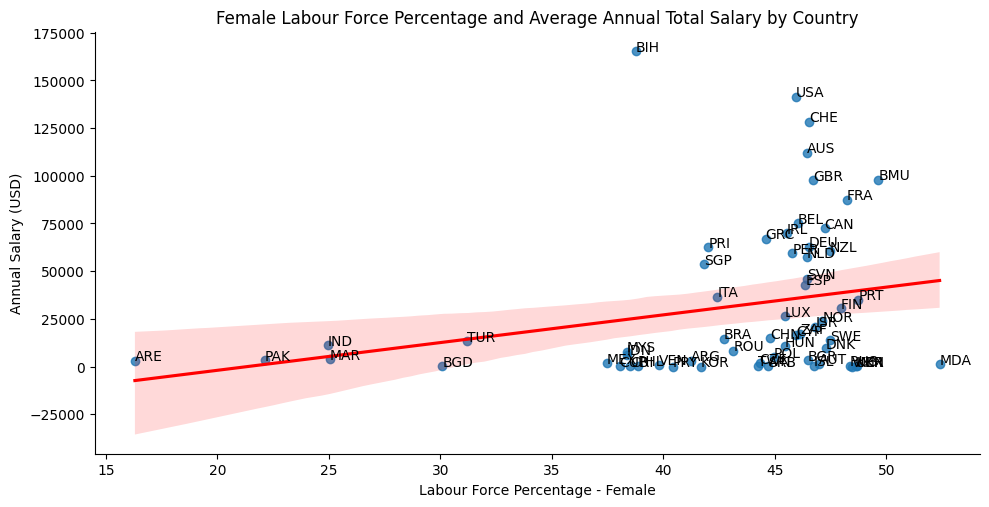

In [317]:
lfmean_df = main_df.groupby('location_country')[['total_salary', 'female_labour_force']].mean().reset_index()

plt.figure(figsize=(9, 6), layout='constrained')

sns.lmplot(x='female_labour_force', y='total_salary', data=lfmean_df, legend=False, aspect=2, line_kws={'color': 'red'})

for line in range(0,lfmean_df.shape[0]):
    plt.text(lfmean_df.female_labour_force[line], lfmean_df.total_salary[line], lfmean_df.location_country[line], horizontalalignment='left')

plt.title('Female Labour Force Percentage and Average Annual Total Salary by Country')

plt.xlabel('Labour Force Percentage - Female')
plt.ylabel('Annual Salary (USD)')
plt.show()

The graph shows a positive relationship between female labor force percentage and annual base salary, which correlates with the previous findings on equal pay legislation and its impact on salary growth.

In countries with legislation ensuring equal pay for males and females, where there tends to be a more equitable distribution of salaries, it's likely that the female labor force participation is higher. This could be indicative of a more inclusive and fair work environment, where women are encouraged to participate in the workforce and are compensated fairly for their contributions. As a result, these countries would exhibit a higher percentage of females in the labor force and also see higher average annual total salaries.

Conversely, in countries lacking equal pay legislation, where salary progression may not align with increasing experience in the field and there may be disparities in compensation between genders, the percentage of females in the labor force might be lower. This could be due to various factors such as gender discrimination, unequal opportunities, or a lack of support for women in the workforce. Consequently, these countries would likely have a lower average annual total salary and a lower percentage of females in the labor force.

Therefore, the findings regarding the relationship between female labor force percentage and annual base salary complement the earlier findings by providing additional insight into the impact of gender equality measures on workforce participation and overall salary levels.

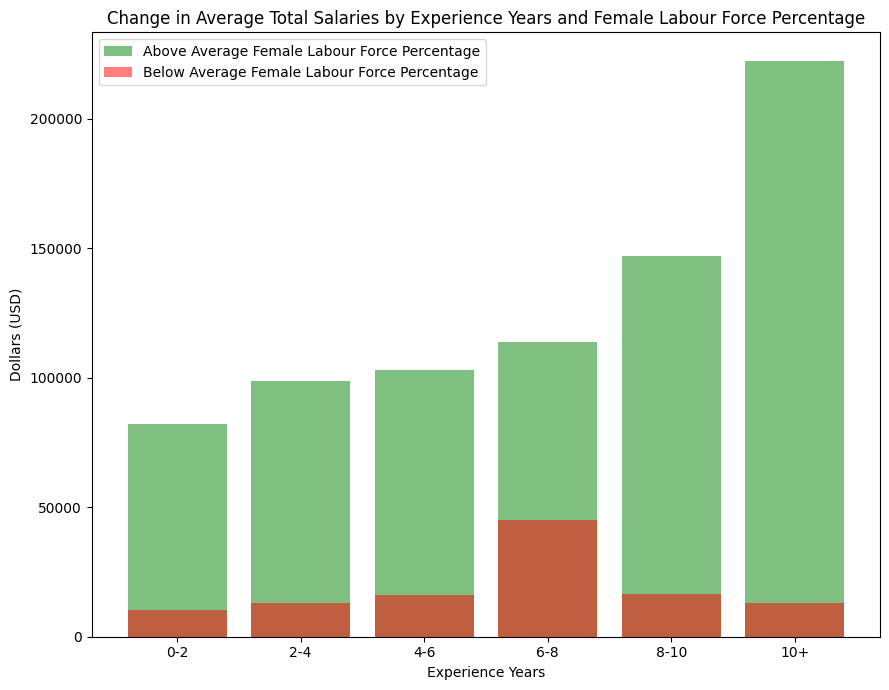

In [319]:
lf_df = main_df.copy()

average_lf_rate = lf_df['female_labour_force'].mean()
lf_df['above_average'] = lf_df['female_labour_force'] > average_lf_rate

lf_df['experience_group'] = pd.cut(lf_df['total_experience_years'], bins=[0, 2, 4, 6, 8, 10, float('inf')], labels=['0-2', '2-4', '4-6', '6-8', '8-10', '10+'])
lfgrouped_df = lf_df.groupby(['above_average', 'experience_group'], observed=True)['total_salary'].mean().reset_index()

lf_above_df = lfgrouped_df[lfgrouped_df['above_average'] == True]
lf_below_df = lfgrouped_df[lfgrouped_df['above_average'] == False]

# Plot
fig, ax = plt.subplots(figsize=(9, 7))

# Plot data for countries with equal_remuneration_law
ax.bar(lf_above_df['experience_group'], lf_above_df['total_salary'], color='green', label='Above Average Female Labour Force Percentage', alpha=0.5)
# Plot data for countries without equal_remuneration_law, adjust position to avoid overlap
ax.bar(lf_below_df['experience_group'], lf_below_df['total_salary'], color='red', label='Below Average Female Labour Force Percentage', alpha=0.5)

ax.set_title('Change in Average Total Salaries by Experience Years and Female Labour Force Percentage')
ax.set_xlabel('Experience Years')
ax.set_ylabel('Dollars (USD)')
ax.legend()
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

This graph shows that individuals working in countries with above-average female labour force participation exhibit a similar pattern of salary growth to those with equal pay legislation, with salaries following an exponential trajectory as experience years increase. This suggests that social dynamics supporting gender equality in the workforce contribute to significant salary progression. Conversely, in countries with below-average female labour force participation, salaries remain consistently lower across all experience years, echoing the disparities observed in nations without equal pay legislation.

In correlation with the graphs regarding equal remuneration laws, these findings collectively emphasize the critical role of regulatory frameworks and societal factors, such as female labor force participation rates, in shaping salary growth trends within the tech industry. Countries with progressive legislation and higher female labor force participation tend to exhibit more favorable salary trajectories as experience years increase, whereas those without such measures experience slower or less consistent salary progression. 

## Conclusion

The analysis of salary trends within the tech industry highlights the nuanced relationship between experience, job category, and compensation. While one might anticipate a consistent upward trajectory in salaries over time, the data reveals significant variations across different fields. Certain roles, particularly in management and non-traditional sectors, exhibit substantial salary growth with increased tenure, while technical roles show minimal progression. These patterns underscore the influence of both experience and technical proficiency on salary dynamics within the industry.

Moreover, the correlation between gender equality measures, such as equal pay legislation and female labor force participation rates, and salary growth trends further emphasizes the impact of regulatory frameworks and societal factors on compensation progression. Countries with progressive legislation and higher female labor force participation tend to experience more favorable salary trajectories, while disparities persist in nations lacking such measures.

Additionally, the analysis highlights the influence of local economic conditions and the availability of skilled workers on salary dynamics. In regions with high living costs and intense competition for talent, experience and specialized skills may carry more weight in determining salary levels. Understanding these nuances is crucial for both employers and employees in navigating career paths and compensation strategies effectively within the tech industry.

## Citation 

Bagger, J., Fontaine, F., Postel-Vinay, F., & Robin, J.-M. (2014). Tenure, Experience, Human Capital, and Wages: A Tractable Equilibrium Search Model of Wage Dynamics. The American Economic Review, 104(6), 1551–1596. http://www.jstor.org/stable/42920859

Goldsmith, A. H., & Veum, J. R. (2002). Wages and the Composition of Experience. Southern Economic Journal, 69(2), 429–443. https://doi.org/10.2307/1061681

Lazear, E. (1976). Age, Experience, and Wage Growth. The American Economic Review, 66(4), 548–558. http://www.jstor.org/stable/1806695

Williams, N. (1991). Reexamining the Wage, Tenure and Experience Relationship. The Review of Economics and Statistics, 73(3), 512–517. https://doi.org/10.2307/2109577